In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_hdf('data-p1/polls_clean.h5')
df

,state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,adjpoll_clinton,adjpoll_trump,samplesizeadj
0,U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220.0,lv,47.00,43.00,45.20163,41.72430,2220.0
1,U.S.,2016-11-01,2016-11-07,Google Consumer Surveys,B,26574.0,lv,38.03,35.69,43.34557,41.21439,5000.0
2,U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195.0,lv,42.00,39.00,42.02638,38.81620,2195.0
3,U.S.,2016-11-04,2016-11-07,YouGov,B,3677.0,lv,45.00,41.00,45.65676,40.92004,3677.0
4,U.S.,2016-11-03,2016-11-06,Gravis Marketing,B-,16639.0,rv,47.00,43.00,46.84089,42.33184,5000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4203,Virginia,2016-09-16,2016-09-22,Ipsos,A-,452.0,lv,46.54,40.04,46.47852,40.48017,452.0
4204,Wisconsin,2016-08-04,2016-08-07,Marquette University,A,683.0,lv,47.00,34.00,48.74781,39.07778,683.0
4205,Utah,2016-11-01,2016-11-07,Google Consumer Surveys,B,286.0,lv,21.33,35.05,26.65200,40.57738,286.0
4206,Oregon,2016-10-21,2016-11-02,Ipsos,A-,446.0,lv,46.46,37.41,45.12949,37.10720,446.0


## How to account for grades?

In [34]:
df["total_adjustment"] = abs(df['rawpoll_clinton']-df['adjpoll_clinton']) + abs(df['rawpoll_trump'] - df['adjpoll_trump'])

In [ ]:
df.boxplot(column='total_adjustment', by='grade')

# Add labels and title
plt.xlabel('grade')
plt.ylabel('total_adjustment')
plt.grid(True)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df['adj_clipped'] = df['total_adjustment'].clip(lower=df['total_adjustment'].quantile(0.025), upper=df['total_adjustment'].quantile(0.975))

df.boxplot(column='adj_clipped', by='grade')

# Add labels and title
plt.xlabel('grade')
plt.ylabel('total_adjustment')
plt.grid(True)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Doesn't seem like bad grade = more adjustment

In [ ]:
# Create the scatter plot
plt.scatter(df['samplesizeadj'], df['total_adjustment'])

# Add labels and title
plt.xlabel("adjusted sample size")
plt.ylabel("total adjustment")

# Show the plot
plt.show()

same for sample size

## Do firms with higher grades tend to favour one candidate or another?

In [6]:
df['c-minus-t'] = df['rawpoll_clinton'] - df['rawpoll_trump']

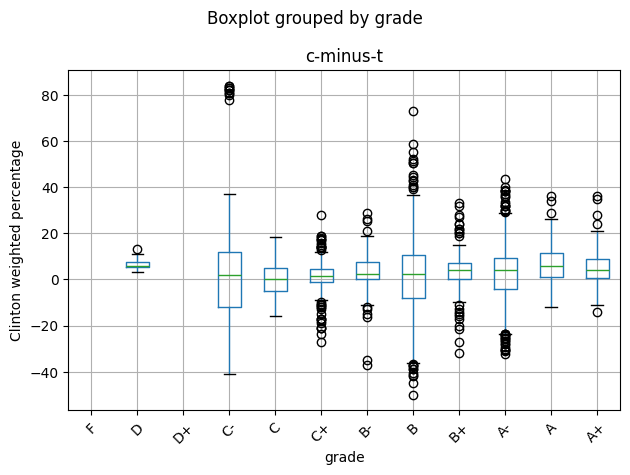

In [7]:
df.boxplot(column='c-minus-t', by='grade')

# Add labels and title
plt.xlabel('grade')
plt.ylabel('Clinton weighted percentage')
plt.grid(True)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()